# 1. Description of the competitions, evaluation, datasets, rules, number of teams
The competition is from kaggle.com, which is a platform for predictive modelling and analytics competitions. Companies and researchers will share their data, statisticians and data miners to all over the world compete to produce best models. For now, there are still a few of competitions open for anyone to join and we had chose one of the competitions which is House Prices: Advanced Regression Technique. This competition is about prediction of each house prices in residential area in Ames , Iowa. Data scientist will use different technique to predict the house price by using machine learning language. Competitors can use different way to preprocess the data and create algorithm to train the data. Then, the created algorithms will be used to predict the test data. 

As the goal of this competition of to predict the sales price for each house. Train and test dataset are given and competitors must predict the value of SalePrice variable in the test set correspond to the ID. The predicted values of SalePrice correspond to ID are save into a .csv file named submission.csv. Then the competitors can submit their file into be evaluated. The submitted file will be evaluated based on Root-Mean-Squared-Error(RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. This is to show the errors in predicting expensive houses and cheap houses will affect the result equally. After the submission of predictions, our ranking will be showed on the leaderboard which the Root-Mean-Squared-Error. 

Starting of the competitions, each team will be provided with a sets of datas which are sample_submission.csv, test.csv, train.csv and data_description.txt. The train.csv data allowed us to run the preprocessed technique and prediction to train the data while test.csv data allowed us to applied the prediction technique in order get correct predictions data and save it into submission.csv file. For the data description.txt, the text file contains various information and description about the features and variables of datasets. There are a total of 79 features(columns) in each datasets including SalePrice and ID for train file, while in test file, the SalePrice feature will be predict by competitors with prediction values. Then after that, the prediction values will be submitted through the website

In this competitions, there are currently 2234 teams competing while the competition’s period is approximately 4 years. This competition had already launched since 8 months ago and have around 3 more years to go until the deadline. 

# 2. Description of the techniques, tools, parameters, code that used in this competition.  

The techniques that we used will mentions below followed be the code, the tools that we use to run the test is Jupyter Notebook, and in order to work in a team, we use github to keep track our code (https://github.com/zisean/dmhouseprice).

For the parameters, we decided to put it into a txt file(https://github.com/zisean/dmhouseprice/blob/master/Dataset/data_description.txt)

The programming language that we used for data exploration and prediction is python and most of the libraries are from Anaconda.


# Explore the data
Before doing any prediction or preprocessing of data, we need to know what’s is going on with the dataset. The target of this project is to find out the final sale price of a house with using 79 factors or variables that will affect the house prices. We used a few of libraries such as numpy, pandas, seaborn, matplotlib, scipy and sklearn to analyse the dataset (train.csv).

In [22]:
#import all needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [23]:
#import file
#Local File
#train = pd.read_csv('./Dataset/train.csv')
#test = pd.read_csv('./Dataset/test.csv')

#Online File
train = pd.read_csv('https://www.dropbox.com/s/i51whixi8pyxopr/train.csv?dl=1')
test = pd.read_csv('https://www.dropbox.com/s/5a86581dbi0yr18/test.csv?dl=1')

In [24]:
#Check all the columns 
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [25]:
#Try to know what is going on with the data
train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
5         Lvl    AllPub    ...            0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
7         Lvl    AllPub    ...            0    NaN    NaN        Shed     350   
8         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   
9         Lvl    AllPub    ...            0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

# Sale Price data description
Sale Price is our target for the result, so we need to use ".describe()" function from pandas library to know the highest and lowest price in order to know wheter our final result (csv file) is almost the same with the train set.

In [26]:
#Train set SalesPrice data description
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Sale price graph
With using sns from seaborn library, we are able to see the skewness of the the sale price data

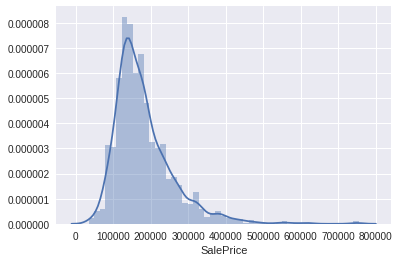

In [27]:
sns.distplot(train['SalePrice'])

# Relationship between GrLivArea/SalePrice

We used scatter plot to represent the data of Grade Living Area and Sale Price, and we found that these 2 attributes have a linear relationship except the 2 outliers

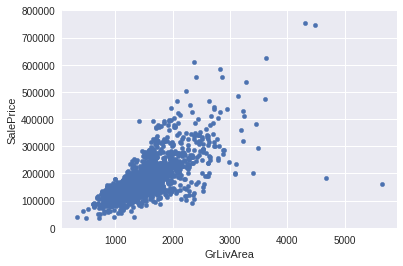

In [28]:
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))

# Relationship between TotalBsmtSF/SalePrice

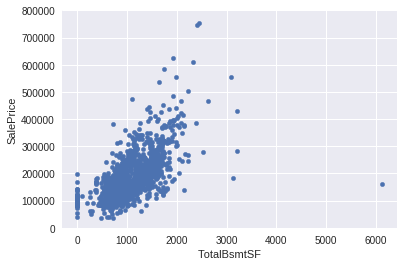

In [29]:
data = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000))

Another atrribute that we found that is also having a linear relationship with the sale price, it is the Total Basement Sq.Ft.

# Relationship between overallqual/SalePrice

(-0.5, 9.5, 0, 800000)

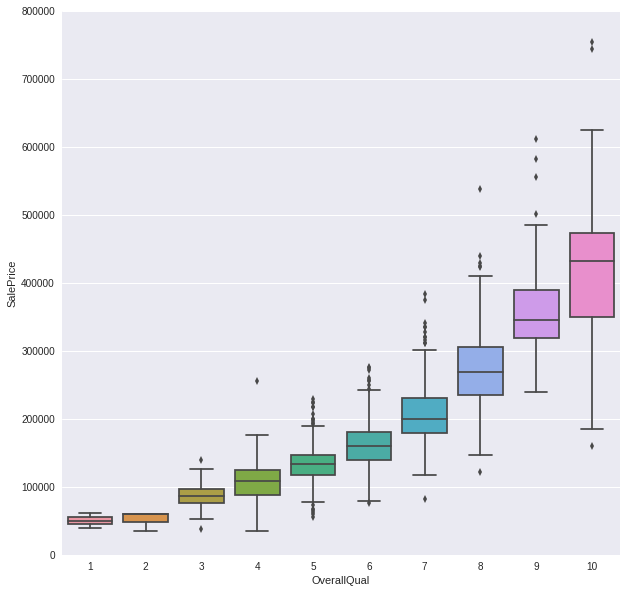

In [30]:
varOQ = 'OverallQual'
data = pd.concat([train['SalePrice'],train[varOQ]], axis =1)
f, ax = plt.subplots(figsize=(10,10))
fig = sns.boxplot(x=varOQ, y ="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

For the relationship of the overall quality and sale price, we found that we need to use the box plot to represent it, if using scatter plot, we are not able to observe the skewness

# Scatter plots between 'SalePrice' and correlated variables

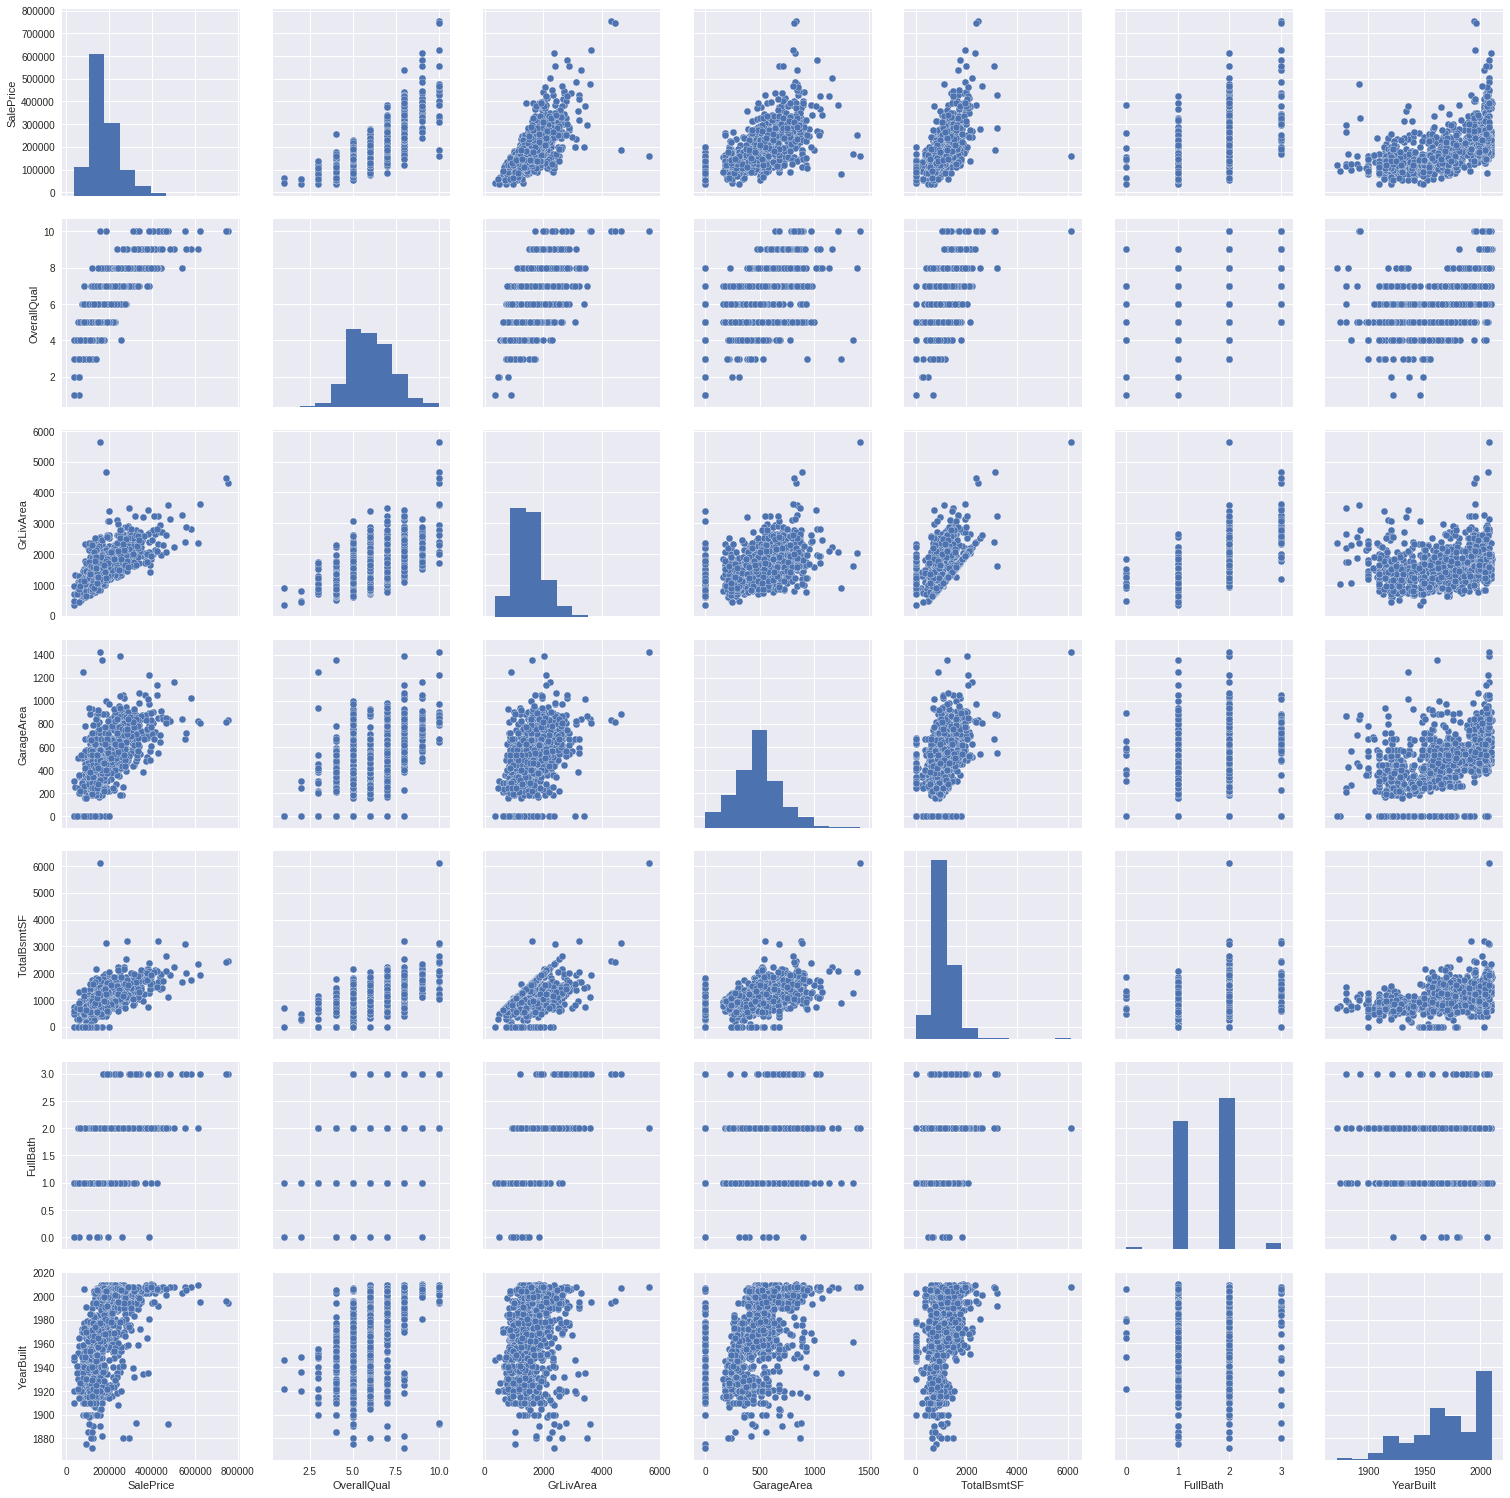

In [31]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 3.0)
plt.show()

With using seaborn library, we are able to see the correlated variables with Sale Price in one picture.

# Finding for missing data

In [32]:
total = train.isnull().sum().sort_values(ascending=False)
percentage = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

Total  Percentage
PoolQC         1453    0.995205
MiscFeature    1406    0.963014
Alley          1369    0.937671
Fence          1179    0.807534
FireplaceQu     690    0.472603
LotFrontage     259    0.177397
GarageCond       81    0.055479
GarageType       81    0.055479
GarageYrBlt      81    0.055479
GarageFinish     81    0.055479
GarageQual       81    0.055479
BsmtExposure     38    0.026027
BsmtFinType2     38    0.026027
BsmtFinType1     37    0.025342
BsmtCond         37    0.025342
BsmtQual         37    0.025342
MasVnrArea        8    0.005479
MasVnrType        8    0.005479
Electrical        1    0.000685
Utilities         0    0.000000

# Data preprocessing

# i) Filling in missing data

First, we analyse each of the parameters containing missing values. We would decide what values are most possible for each parameters.

**LotFrontage:** _Linear feet of street connected to property._ This would not have value 0 as this would mean a property without access, so either impute mean, or maybe see if there's a correlation with LotArea. 
  
**Alley:** _Type of alley access to property._ There are too many missing values, we can presume that these properties don't have an alley access.  
  
**MasVnrType/MasVnrArea:** Both have 8 values missing, We presume they are the same ones. Either fill in as "None"/0 or use most frequent value/median.  
  
**Bsmt... Variables:** _A number of variables in connection with the basement._ There are about the same number of missing values. However, there are two basement-related variables without missing values, "BsmtFinSF1" and "BsmtFinSF2". In the cases where the categorical variables are NaN, the numerical ones are 0. Which means there's no basement, so the categorical ones should also be set to "None".
  
**Electrical:** Just one missing value. We just impute the most frequent value.  
  
**FireplaceQu:** We assume the properties with missing values just don't have a fireplace.  
  
**Garage ... Variables:** There are 81 missing values in these columns. However, there are some Garage-related variables without missing values: GarageCars, GarageArea. Similar to the Basement variables, in the cases where the categorical variables are NaN, the numerical ones are 0. Which means there's no garage, so the categorical ones should also be set to "None". 
  
**PoolQC:** These properties probably don't have a pool, so we set the values as 0.  
  
**Fence:** There are many missing values, mostly likely there's no fence, so we just impute 'None'.  
  
**MiscFeature:** Assuming none means probably no special features, we just impute 'None'.  


The purpose of the function defined below is to allow us to analyse each attributes.

In [33]:
def cat_exploration(column):
    return train[column].value_counts()

The purpose of function defined below is to allow us to impute the missing values

In [34]:
def cat_imputation(column, value):
    train.loc[train[column].isnull(),column] = value

# ii) Normalizing the data

We transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9050e76978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f904fa45518>]], dtype=object)

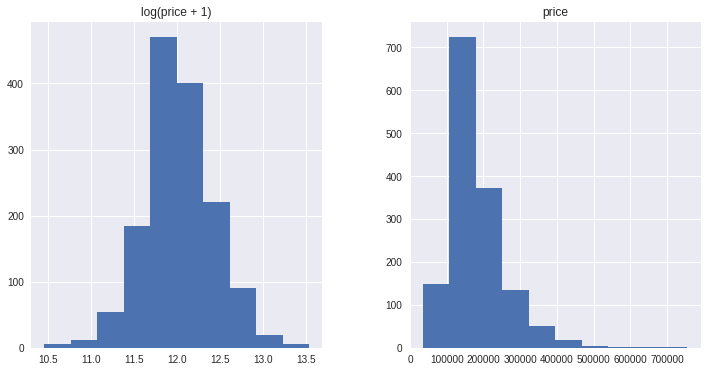

In [35]:
plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

# Preventing Outliers

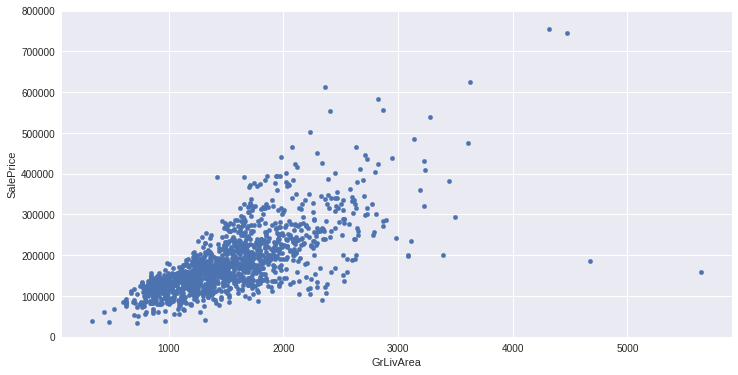

In [36]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [37]:
#Deleting abnormal points
train.sort_values(by = 'GrLivArea', ascending = False)[:2]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
523    524          60       RL        130.0    40094   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
1298         Bnk    AllPub    ...          480     Gd   NaN         NaN   
523          Bnk    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1298       0      1   2008       New        Partial     160000  
523        0     10   2007       New        Partial     184750  

[2 rows x 81 columns]

In [38]:
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

In [39]:
train = pd.get_dummies(train)

# Result that you obtained in the leaderboard.

Result before having data preprocessing and xgboost

<img src="https://www.dropbox.com/s/ixans7xgz3ukee0/Screenshot_Result.png?dl=1",width=1000,height=1000>

Ranking after doing data preprocessing and adding xgboost

<img src="https://www.dropbox.com/s/oghkbleqy6stgmj/Screenshot_Result_3.png?dl=1" ,width=1000,height=1000>

# Our insight and analysis of the competition, and recommendations to other teams if they were to participate in this competition.

Many participants in this competition joined for the purpose of education. Many are trying to learn about data mining and they use this competition as a platform to test their skills. There are also teams that consists of students joining this competition for assignment purpose. There is also no shortage of participants who joined to teach and share their knowledge on data mining. Many Kernels are published publicly as tutorials for people wanting to learn data mining.

Before taking part in this competition, participants must have knowledges and experiences on machine learning and data mining. Participant should have the ability to use python programming language to generate out a graph to analyse the data

Participants should pre-process the training data set before they start working on their prediction programme. Participants must first identify outliers and then remove the outliers as best as they can. The training data must also be screened for any missing values. These missing values should be filled in, either with mean value or most common value. Participants may also create a value depicting unknown. It is possible to replace some non-numerical value data into numerical values. Prediction programmes have higher affinity with numerical data compared to non-numerical data. These steps will help improve their prediction accuracy greatly. 

During the prediction of the SalePrice, we had try to improve results by combining different type of techniques. Those techniques applied were actually learned from other participants. At the beginning, we tried simple linear regression method and applied the prediction into the submission.csv file. Then we tried to submit our prediction to the competitions website. The calculated ranking was 2089 which means that the method used for predictions was not suitable. After a few trials, the predictions result did not showed any improvement and we decide to change another method which is more advanced linear regression method. By referring some of the suggested techniques by other participants, we managed to improve our result until ranking number 939. Then, we try to preprocess the data which means refill the NA values in some features and also get rid of unrelated features with too many null or NA values. Then we try to eliminate the outliers in the which show the anomalies of Sales price correspond to the GrLivArea(Above grade(ground) living area square feet. For the prediction method, we use lasso and ridge regression function to calculate the prediction. After advanced preprocess data and combine models used, the prediction results show better improvement as we managed to get until 496th place which is approximately below 25% of the total teams participated. 